# 연습문제 풀이

* 1. 수백만개의 특성을 가진 훈련 세트는 경사하강법이 적합한 방법으로 생각된다.
* 2. 훈련세트에 특성들이 제 각기 스케일이 모두 다르다면 경사하강법을 적용할때 loss를 구해야 하는데 이때 각 특성별로 정확한 loss 가 구해지지 못해 한쪽에 편향된 결과가 도출되게 된다.
* 3. 로지스틱 회귀는 Convex 함수를 cost 함수로 가지기 때문에 local minima에 갇힐 염려는 없다.
* 4. 학습률에 따라 결과는 제 각기 다를것이다. 다만 학습률이 같다면 거의 유사한 결과를 도출한다.
* 5. 검증 오차가 상승되는것은 훈련데이터에만 오버피팅되어 훈련데이터 이외의 데이터에는 적합하지 못한 모델이 되어가고 있다는 뜻이다.
* 6. 검증 오차가 상승한다고 해서 즉시 중단하면 안된다. 미니배치 경사 하강법은 배치에 따라서 오차가 상승할 수도 있기 때문이다. 따라서 상승하더라도 수차례 더 지켜보고 중단하는것이 더 옳은 판단이다.
* 7. 가장 빠르게 수렴하는 경사하강법은 배치 경사하강법일 것으로 예측된다. 전체 데이터 세트에 loss를 한번에 적용하기 때문에 속도는 가장 빠를 것으로 예측된다. 다른 경사 하강법 모델도 물론 수렴하게 만들 수 있다. -> 틀림 (확률적 경사 하강법)
* 8. 다항 회귀시에 훈련오차와 검증오차간에 간격이 큰 것은 데이터가 부족하여 검증데이터에 존재하는 데이터를 예측할 수 없는 방향으로 학습을 하기 때문에 일어나는 현상이다. 따라서, 학습데이터를 더욱 추가하거나 특성에 대한 분석이 더욱 필요할 것으로 예측된다. -> 틀림 (모델이 훈련세트에 과대적합되어서 그런다. 규제를 두어서 자유도를 줄이는 방법을 해야 한다. 물론 데이터세트를 추가하는것도 방법이라서 완전히 틀린것은 아닌것 같음)
* 9. 훈련오차와 검증오차가 일치하고 둘 다 높은 오차율을 가진다면 높은 편향이 문제일 것으로 추측된다. 규제 하이퍼파라메터 a 를 줄여서 규제를 줄이고 편향을 낮추도록 하는것이 더욱 도움될것같다. -> 과소적합
* 10. 문제의 답은 아래
1. 평범한 선형회귀는 각 가중치가 높은 값을 가져 훈련데이터에 오버피팅 되는 경향이 있다. 따라서 이를 방지하려면 규제를 두어 각 가중치의 값(편향 제외)에 제약을 거는 방법을 사용한다.
2. 릿지 회귀 대신 라쏘 회귀를 쓰는 경우는 특성값중에서 특정 몇개의 값에 대해 결과가 도출되는 경향이 강하다면 라쏘 회귀가 효과적이다.
3. 라쏘 회귀는 특정 특성값이 매우 강한 연관이 존재할 경우 해당 특성에 대해서만 학습이 될 우려가 있기 때문에 엘라스틱넷을 사용하는것이 더욱 안전하다.
* 11. 사진을 낮,밤 그리고 실내, 실외로 분류하기 위해서는 각 분류되어야할 특성이 서로 겹칠 수 있는 특성이기 때문에(밤이면서 실내) 두개의 로지스틱 회귀 분류기를 만들어야 한다.

* 12. 조기 종료를 사용한 배치 경사 하강법으로 소프트맥스 회귀를 구현해 보세요 (사이킷런 사용 X)

In [33]:
import numpy as np

def batch_GD(X, y, epochs=1000, learning_rate=0.01, early_stop=10):
    theta = np.random.randn(2,1)
    early_count = 0
    best_theta = 0

    for epoch in range(epochs):
        gradients = 2/X.shape[0] * X.T.dot(X.dot(theta)-y)
        loss = learning_rate*gradients
        theta = theta - loss
        print(f'epoch : {epoch+1}, loss : {loss.reshape(-1)}, sum loss: {np.sum(loss)}')
        
        if (np.sum(loss) > 0):
            early_count+=1
        else:
            best_theta = theta.copy()
            
        if early_count>=early_stop:
            print("하강 중단")
            theta = best_theta
            break

    return theta

In [34]:
X = 2 * np.random.rand(100, 1)
y = 4+3 * X + np.random.rand(100, 1)

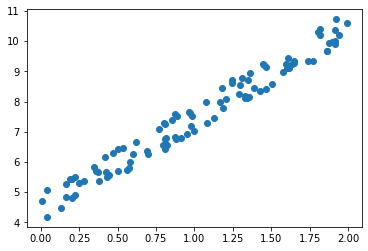

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y)

In [36]:
X = np.c_[np.ones((100, 1)), X]

In [38]:
learning_rate = 0.1
epoch = 2000

result = batch_GD(X, y, epoch, learning_rate, 2)

epoch : 1, loss : [-1.5222067  -1.77244718], sum loss: -3.2946538754022274
epoch : 2, loss : [-0.85348926 -0.97323751], sum loss: -1.8267267708964443
epoch : 3, loss : [-0.48277013 -0.53076857], sum loss: -1.0135386937649902
epoch : 4, loss : [-0.27713172 -0.28590484], sum loss: -0.5630365659913875
epoch : 5, loss : [-0.16294577 -0.15049539], sum loss: -0.31344115747858026
epoch : 6, loss : [-0.09942657 -0.07571025], sum loss: -0.17513682653433665
epoch : 7, loss : [-0.06398117 -0.03450089], sum loss: -0.09848206007392046
epoch : 8, loss : [-0.04409426 -0.01188426], sum loss: -0.055978520334886456
epoch : 9, loss : [-0.03283293  0.00043913], sum loss: -0.032393808742472344
epoch : 10, loss : [-0.0263566  0.0070665], sum loss: -0.01929009304937668
epoch : 11, loss : [-0.0225376   0.01054429], sum loss: -0.011993307961843126
epoch : 12, loss : [-0.02019716  0.01228287], sum loss: -0.00791428127332279
epoch : 13, loss : [-0.01868212  0.01306338], sum loss: -0.005618742418228436
epoch : 14

In [42]:
y_hat = X.dot(result)

In [46]:
# MAE
np.average(y_hat-y)

-7.114309141798003e-15